# Similarity measures for the atomic representations

This notebook provides the code used to plot the distance/correlation plots for the chemical representations featured in our publication

TODO: Create a plotting module to handle building subplots of multiple AtomicEmbedding outputs

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import smact
from sklearn import decomposition

from AtomicEmbeddings.core import Embedding

## Pre-processing


In [2]:
# Set up the Atomic Embedding features

# Create a list of the CBFVs we are interested in
cbfvs = ["mat2vec", "random_200", "magpie_sc", "megnet16"]

# Create a dictionary of {cbfv: AtomicEmbeddings}
AtomEmbeds = {cbfv: Embedding.load_data(cbfv) for cbfv in cbfvs}

In [3]:
# Only keep the first 83 elements for the Atomic Embeddings

# For now Smact is used, but a future update will aim to remove this dependency
el_symbols = smact.ordered_elements(1, 83)

In [4]:
# Iterate over the AtomEmbeds to remove the elements

for cbfv in cbfvs:

    # Get the keys of the atomic embeddings object
    elements = set(AtomEmbeds[cbfv].element_list)
    el_symbols_set = set(el_symbols)

    # Get the element symbols we want to remove
    els_to_remove = list(elements - el_symbols_set)

    # Iteratively delete the elements with atomic number
    # greater than 83 from our embeddings
    for el in els_to_remove:
        del AtomEmbeds[cbfv].embeddings[el]

    # Verify that we have 83 elements
    print(len(AtomEmbeds[cbfv].element_list))

83
81
83
83


In [5]:
m16_els = AtomEmbeds["megnet16"].element_list
r200_els = AtomEmbeds["random_200"].element_list
set(m16_els) - set(r200_els)

{'Ga', 'Ge'}

## Distance and correlation plots for the high-dimensional representations

/Users/aonwu/Documents/Project 2/Atomic_Embeddings/AtomicEmbeddings/AtomicEmbeddings.py:126: RuntimeWarning: divide by zero encountered in double_scalars
  recip_dist= dist**-1
/Users/aonwu/Documents/Project 2/Atomic_Embeddings/AtomicEmbeddings/AtomicEmbeddings.py:126: RuntimeWarning: divide by zero encountered in double_scalars
  recip_dist= dist**-1
/Users/aonwu/Documents/Project 2/Atomic_Embeddings/AtomicEmbeddings/AtomicEmbeddings.py:126: RuntimeWarning: divide by zero encountered in double_scalars
  recip_dist= dist**-1
/Users/aonwu/Documents/Project 2/Atomic_Embeddings/AtomicEmbeddings/AtomicEmbeddings.py:126: RuntimeWarning: divide by zero encountered in double_scalars
  recip_dist= dist**-1


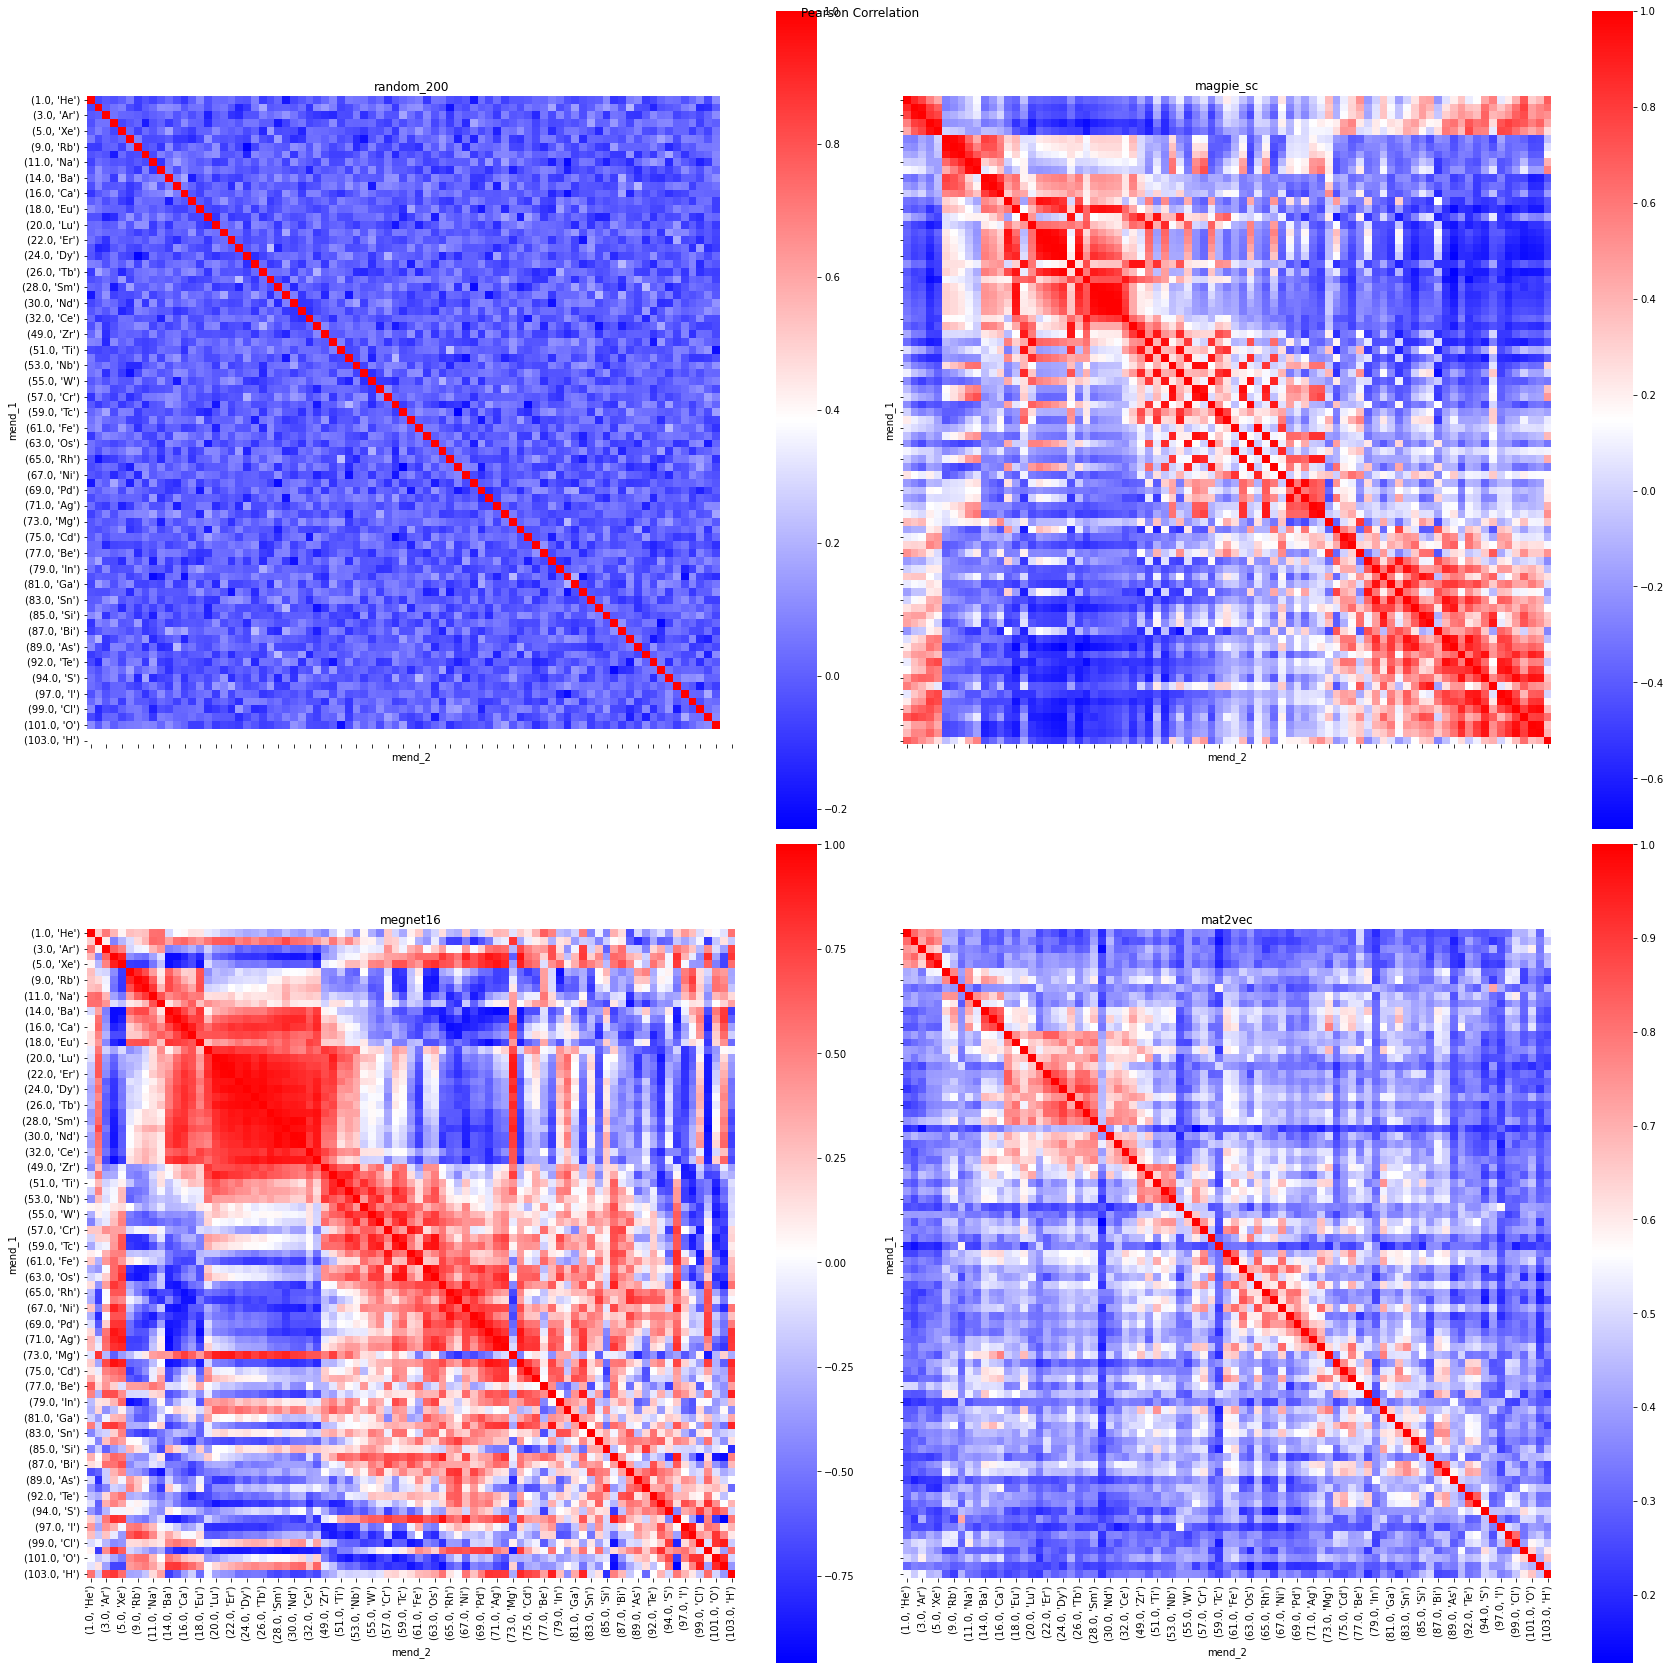

In [6]:
# Let's start generating the plots

# Plotting pearson correlations

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    2,
    2,
    sharex="col",
    sharey="row",
    figsize=(24, 24),
)
axes = [ax1, ax2, ax3, ax4]
fig.suptitle("Pearson Correlation")
for i, cbfv in enumerate(cbfvs):

    p = AtomEmbeds[cbfv].create_pearson_pivot_table()
    g = sns.heatmap(
        p,
        cmap="bwr",
        square="True",
        linecolor="k",
        ax=axes[i - 1],
    )
    axes[i - 1].title.set_text(cbfv)


fig.tight_layout()
plt.show()

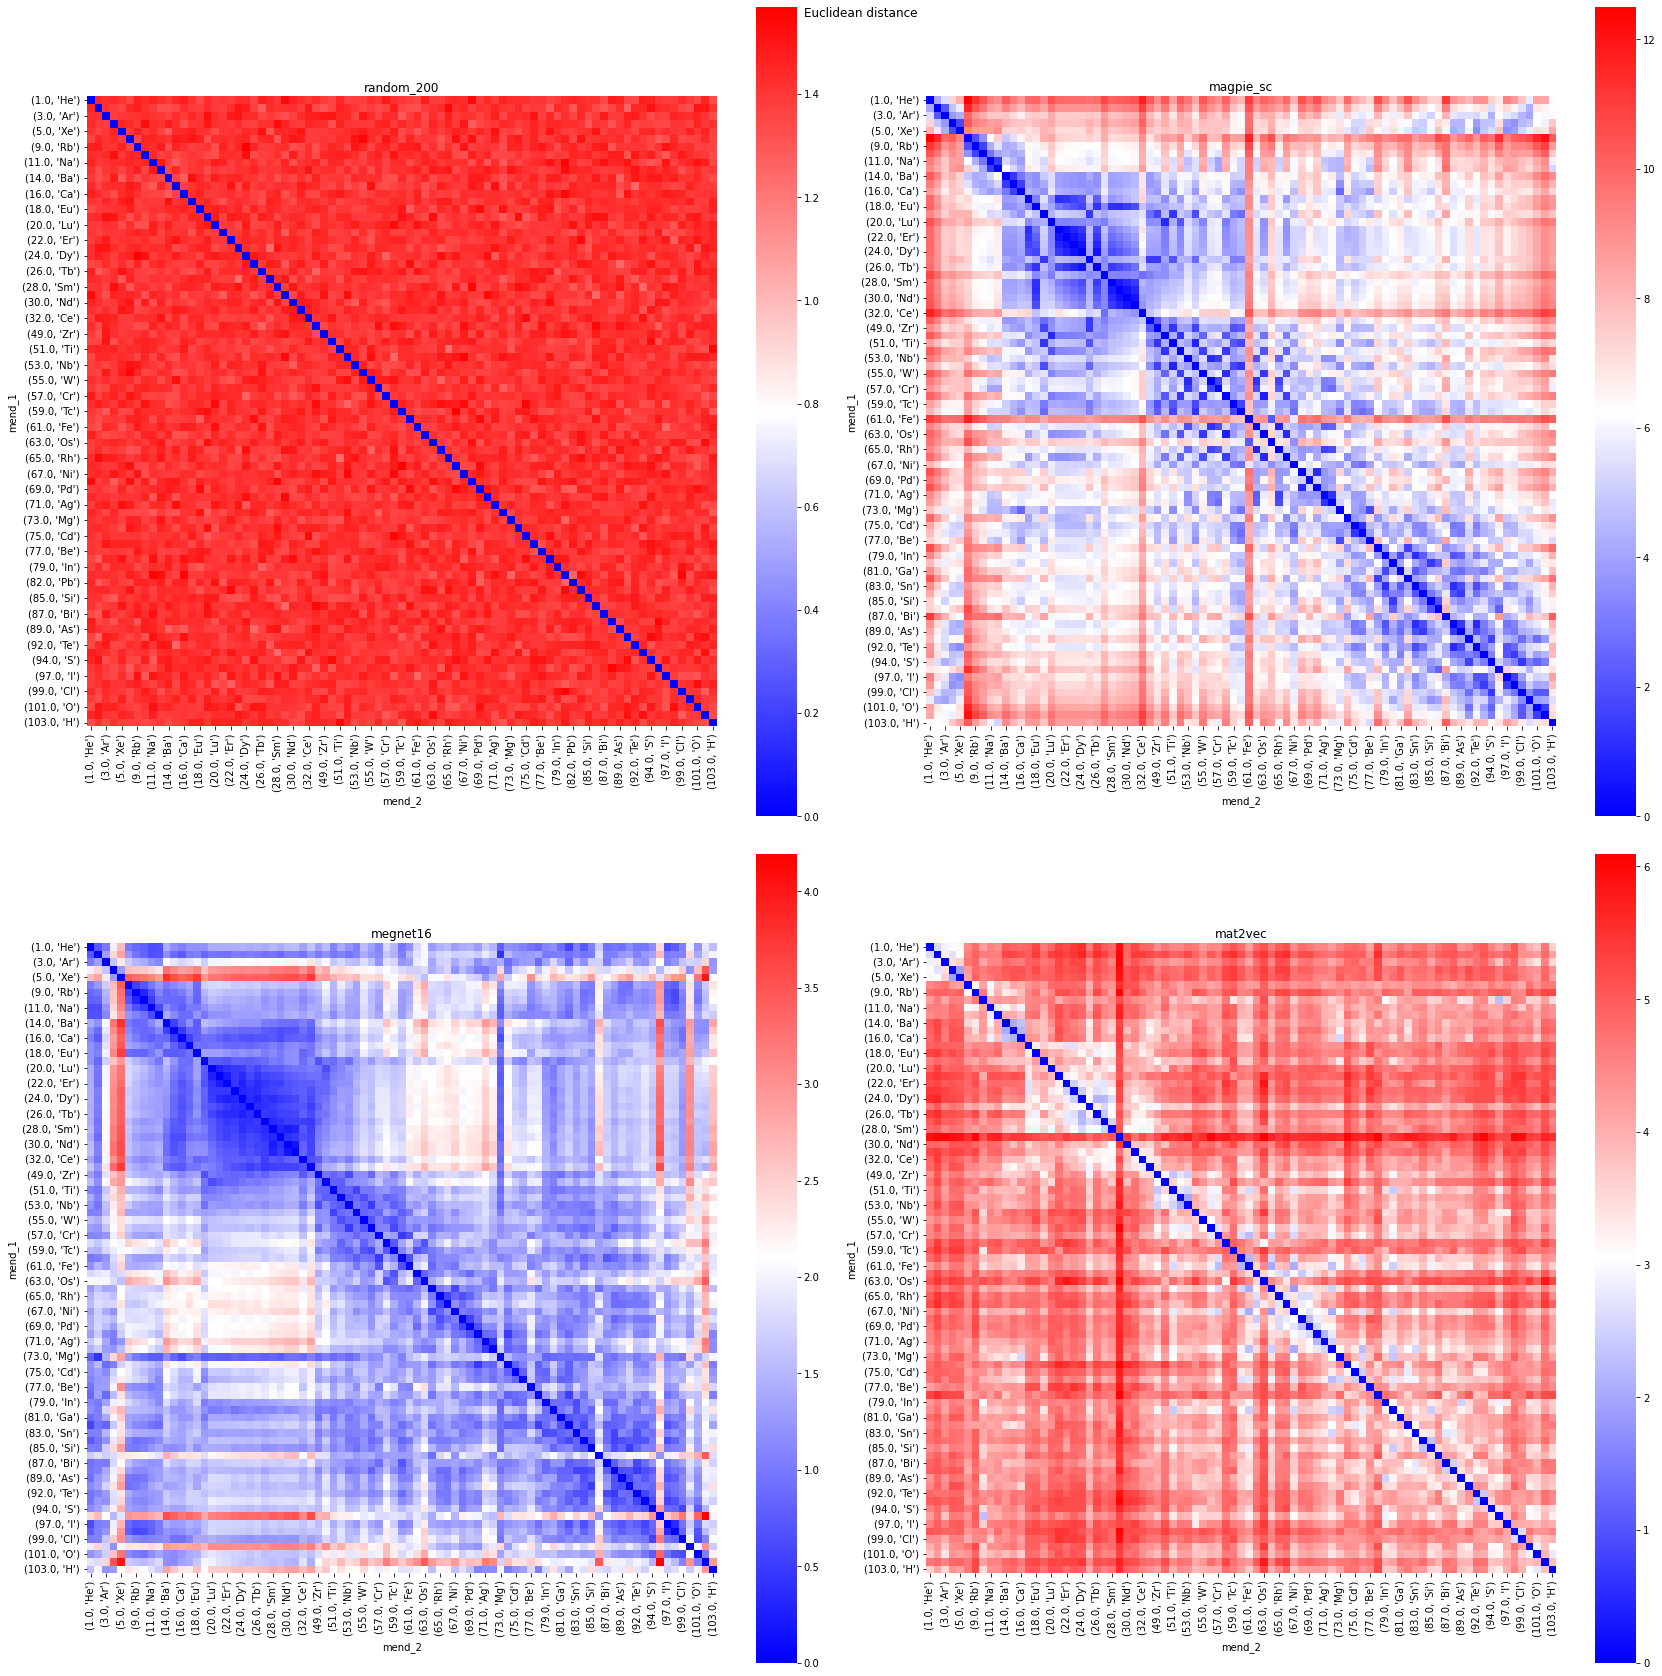

In [7]:
# Let's start generating the plots

# Plotting Euclidean correlations

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    2,
    2,
    figsize=(24, 24),
)
axes = [ax1, ax2, ax3, ax4]
fig.suptitle("Euclidean distance")
for i, cbfv in enumerate(cbfvs):

    p = AtomEmbeds[cbfv].create_distance_pivot_table(metric="euclidean")
    g = sns.heatmap(
        p,
        cmap="bwr",
        square="True",
        linecolor="k",
        ax=axes[i - 1],
    )
    axes[i - 1].title.set_text(cbfv)


fig.tight_layout()
plt.show()

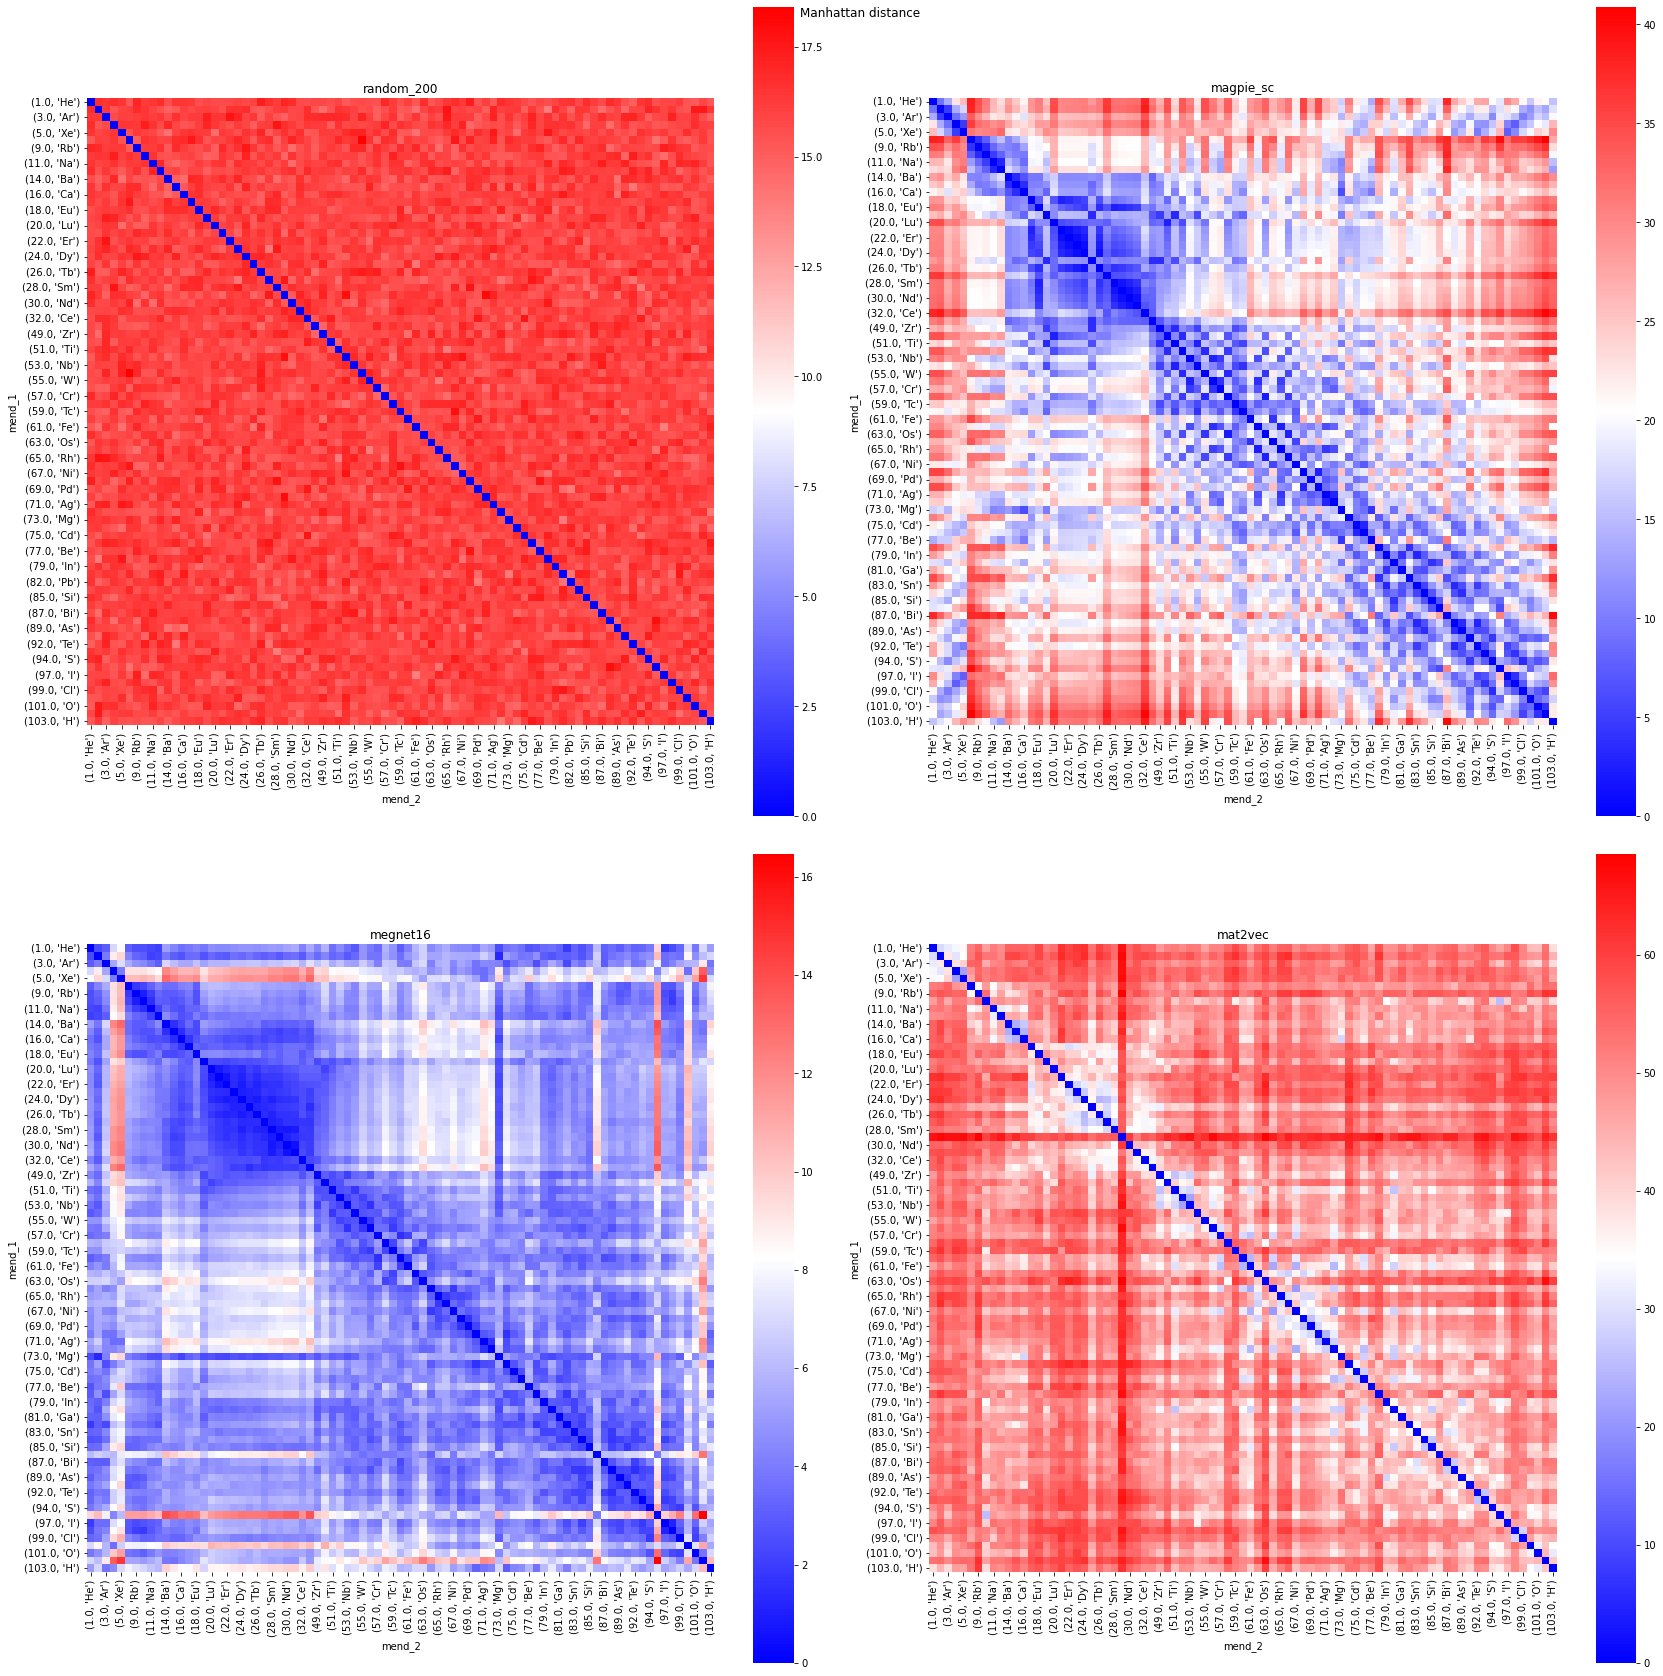

In [8]:
# Let's start generating the plots

# Plotting Manhattan correlations

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    2,
    2,
    figsize=(24, 24),
)
axes = [ax1, ax2, ax3, ax4]
fig.suptitle("Manhattan distance")
for i, cbfv in enumerate(cbfvs):

    p = AtomEmbeds[cbfv].create_distance_pivot_table(metric="manhattan")
    g = sns.heatmap(
        p,
        cmap="bwr",
        square="True",
        linecolor="k",
        ax=axes[i - 1],
    )
    axes[i - 1].title.set_text(cbfv)


fig.tight_layout()
plt.show()

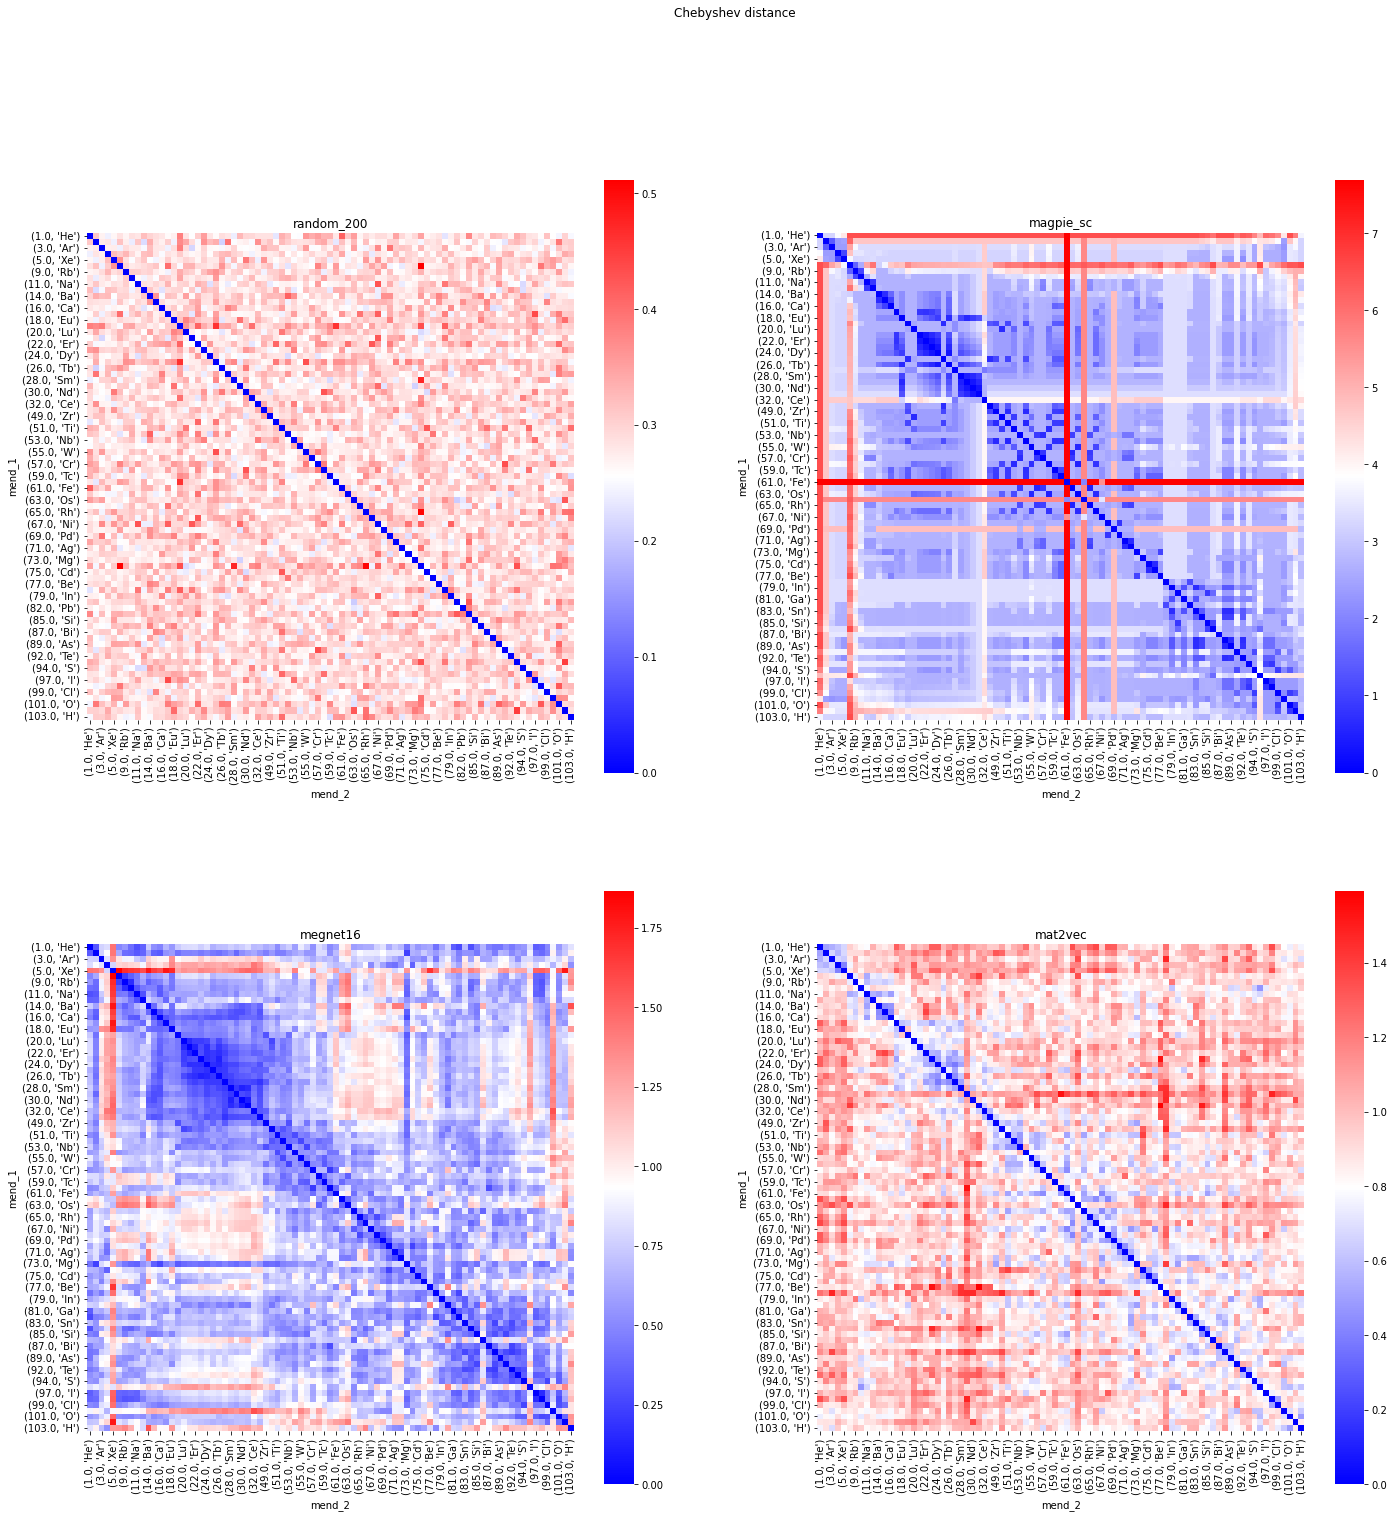

In [9]:
# Let's start generating the plots

# Plotting Chebyshev correlations

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    2,
    2,
    figsize=(24, 24),
)
axes = [ax1, ax2, ax3, ax4]
fig.suptitle("Chebyshev distance")
for i, cbfv in enumerate(cbfvs):

    p = AtomEmbeds[cbfv].create_distance_pivot_table(metric="chebyshev")
    g = sns.heatmap(
        p,
        cmap="bwr",
        square="True",
        linecolor="k",
        ax=axes[i - 1],
    )
    axes[i - 1].title.set_text(cbfv)


plt.show()

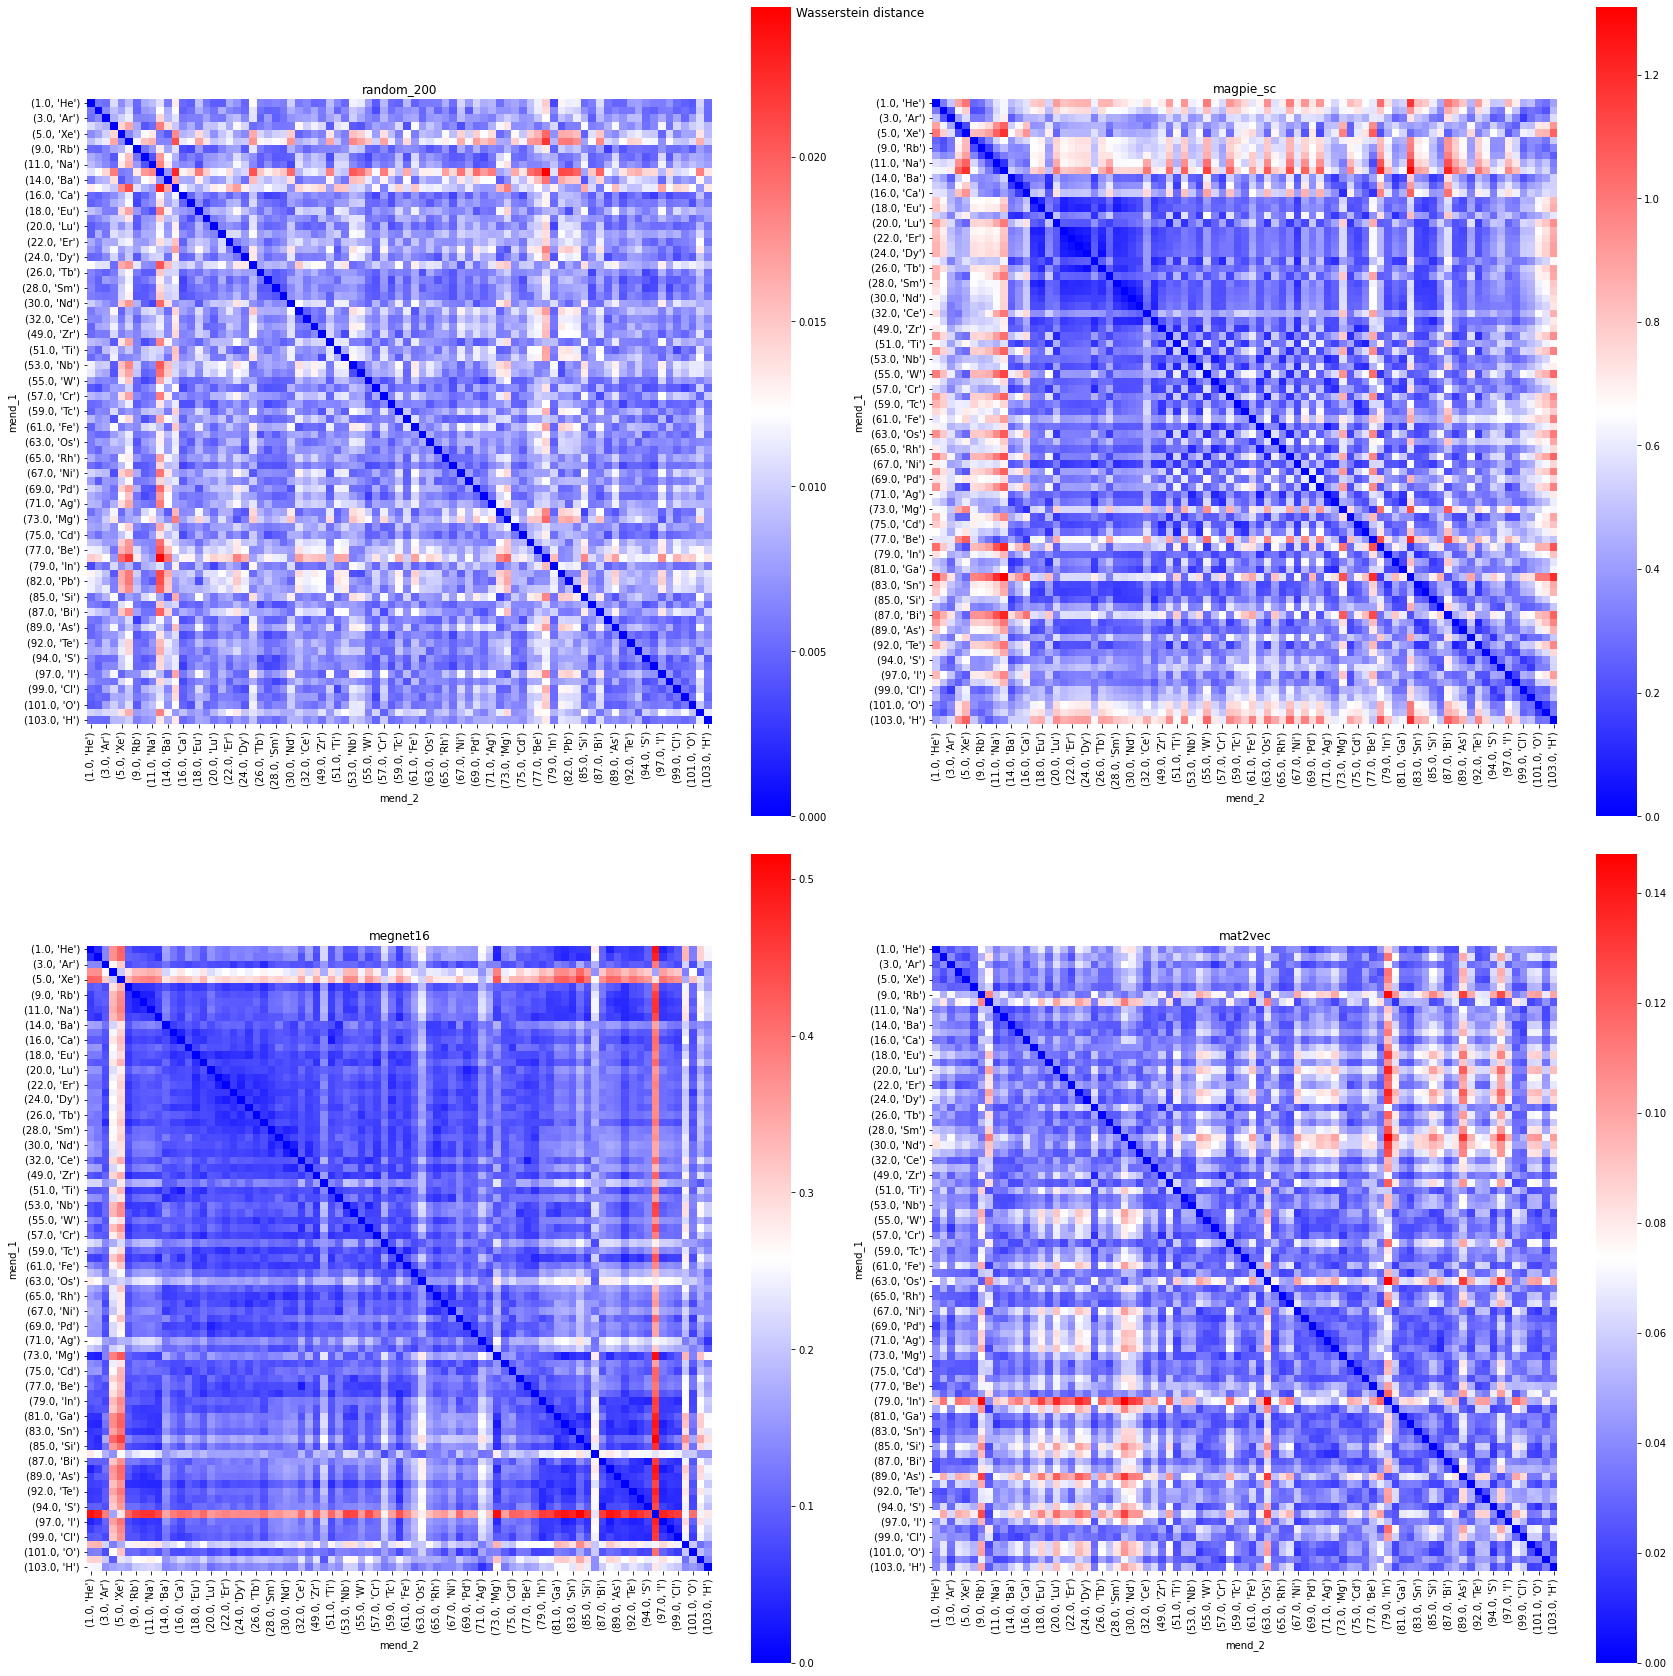

In [10]:
# Let's start generating the plots

# Plotting Wasserstein distances

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    2,
    2,
    figsize=(24, 24),
)
axes = [ax1, ax2, ax3, ax4]
fig.suptitle("Wasserstein distance")
for i, cbfv in enumerate(cbfvs):

    p = AtomEmbeds[cbfv].create_distance_pivot_table(metric="wasserstein")
    g = sns.heatmap(
        p,
        cmap="bwr",
        square="True",
        linecolor="k",
        ax=axes[i - 1],
    )
    axes[i - 1].title.set_text(cbfv)


fig.tight_layout()
plt.show()

## Clustering analysis (Dimensionality reduction)

In this section we will show clustering analysis of the different chemical representations

TODO: Add a hue for the group of the elements to show better clustering

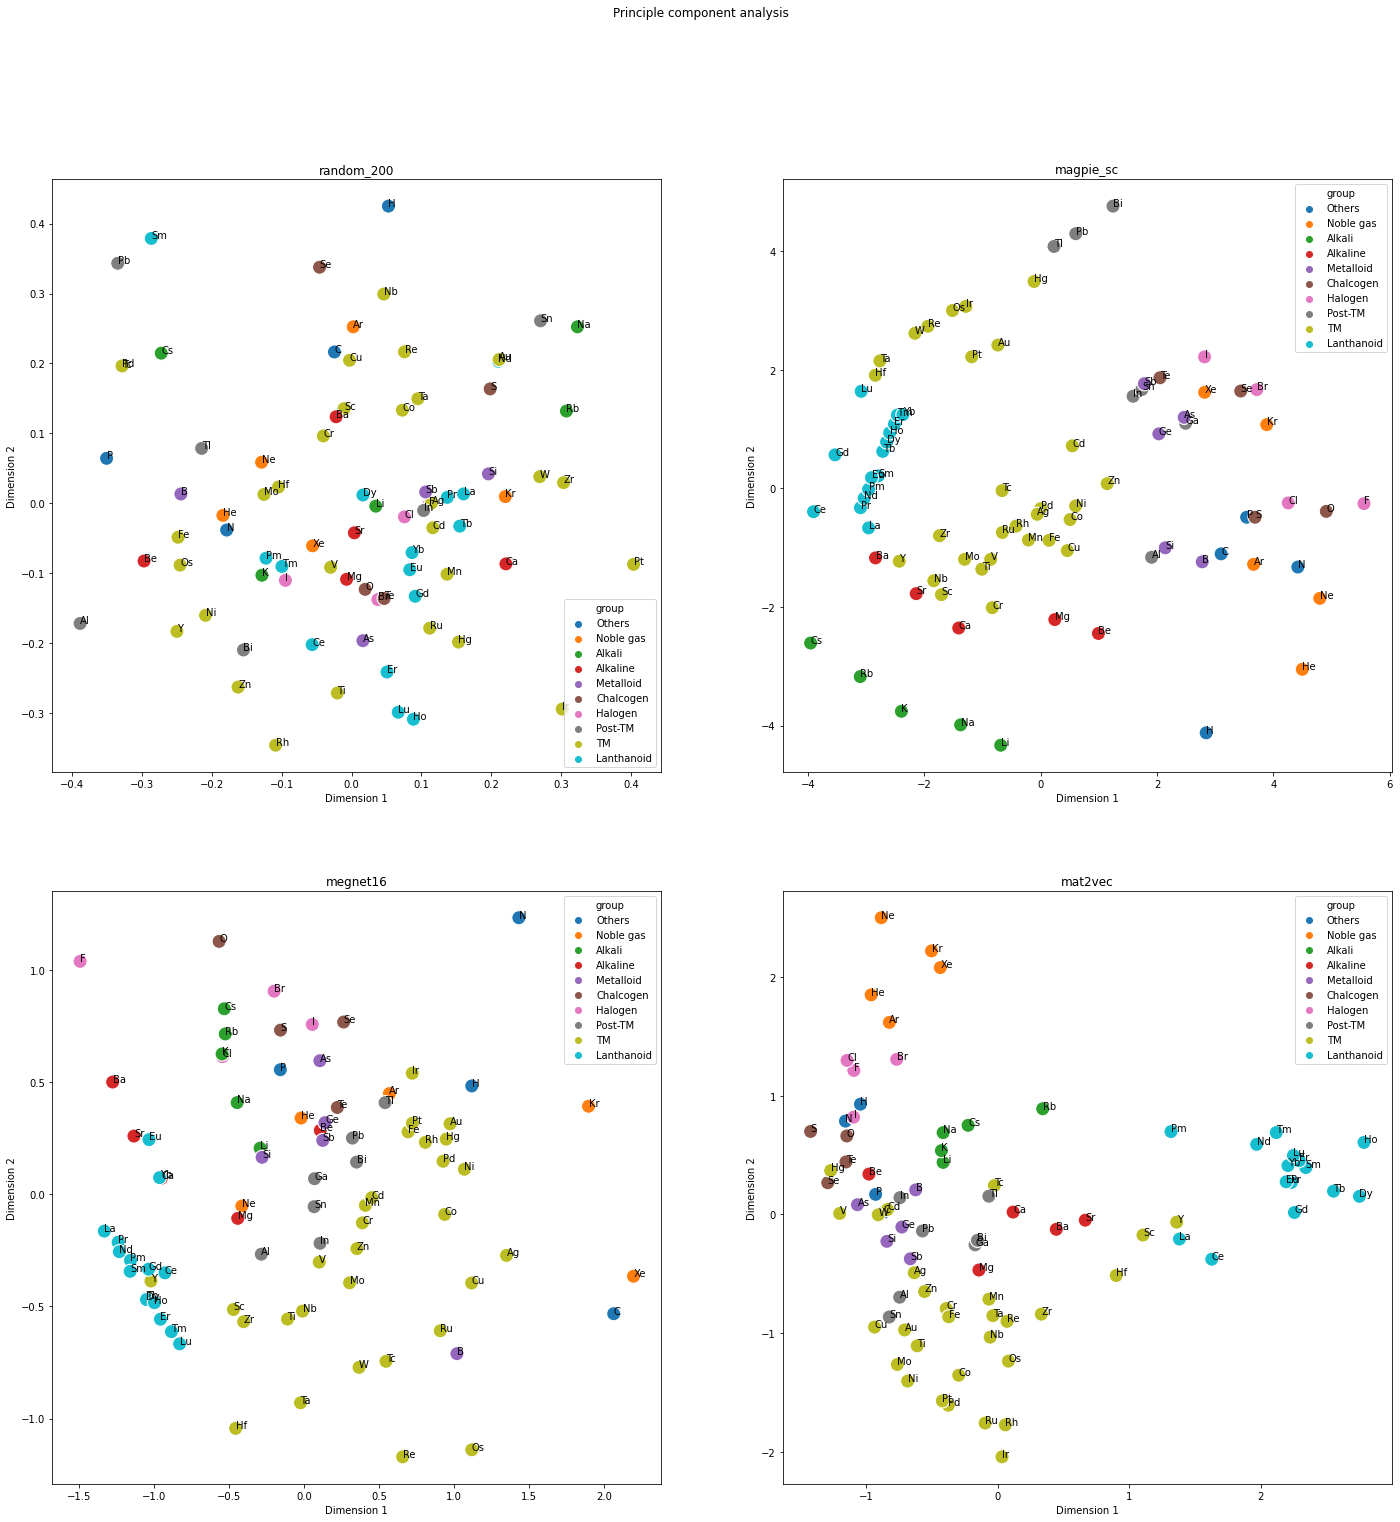

In [11]:
# Make the PCA plots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    2,
    2,
    figsize=(24, 24),
)
axes = [ax1, ax2, ax3, ax4]
fig.suptitle("Principle component analysis")
for i, cbfv in enumerate(cbfvs):

    AtomicEmbed = AtomEmbeds[cbfv]

    # Create an array of the embedding vectors
    embeddings_array = np.array(list(AtomicEmbed.embeddings.values()))
    # Create an array of the elements
    element_array = np.array(AtomicEmbed.element_list)

    # Perform the PCA
    pca = decomposition.PCA(n_components=2)  # project to 2 dimensions
    pca.fit(embeddings_array)
    X = pca.transform(embeddings_array)

    pca_dim1 = X[:, 0]
    pca_dim2 = X[:, 1]
    # Create a dataframe to store the dimensions,
    # labels and group info for the PCA
    pca_df = pd.DataFrame(
        {
            "pca_dim1": pca_dim1,
            "pca_dim2": pca_dim2,
            "element": element_array,
            "group": list(AtomicEmbed.element_groups_dict.values()),
        }
    )

    g = sns.scatterplot(
        x="pca_dim1",
        y="pca_dim2",
        data=pca_df,
        hue="group",
        s=200,
        ax=axes[i - 1],
    )

    axes[i - 1].set_xlabel("Dimension 1")
    axes[i - 1].set_ylabel("Dimension 2")

    for idx in range(len(X)):
        axes[i - 1].text(
            x=pca_dim1[idx],
            y=pca_dim2[idx],
            s=element_array[idx],
        )

    # Title the plots
    axes[i - 1].title.set_text(cbfv)


plt.show()